<a href="https://colab.research.google.com/github/hida0/Python_MachineLearning/blob/sklearn/sklearn_2_%EB%B6%84%EB%A5%98_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80_%ED%99%95%EB%A5%A0%EC%A0%81%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95_%EC%B5%9C%EA%B7%BC%EC%A0%91%EC%9D%B4%EC%9B%83_%EC%84%9C%ED%8F%AC%ED%8A%B8%EB%B2%A1%ED%84%B0_%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95%EB%82%98%EB%AC%B4_%EC%98%A4%EC%B0%A8%EC%A7%80%ED%91%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings

# 불필요한 경고 출력을 방지합니다.
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np

## 실습에 주로 활용할 샘플 데이터 세트를 확인 가능

[sklearn.datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)

`sklearn.dataset`에서 제공해주는 다양한 샘플 데이터를 활용합니다.

## 1. 분류 예측
어떤 그룹에 속하는지 **문자형 값**을 예측

[iris 데이터셋](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris) : 꽃 종류 분류하기

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
# iris 데이터셋을 로드합니다.
iris = load_iris()

* `DESCR`: 데이터셋의 정보를 보여줍니다. (describe의 약자)
* `data`: feature data (설명변수)
* `feature_names`: feature data의 컬럼 이름
* `target`: label data (수치형)
* `target_names`: label의 이름 (문자형)

In [ ]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
data = iris['data'] # 설명변수
data[:3] # 4개의 설명변수가 존재

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [ ]:
feature_names = iris['feature_names']
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

* **sepal**: 꽃 받침
* **petal**: 꽃잎

In [ ]:
target = iris['target'] # 종속변수
target[:3]

array([0, 0, 0])

In [ ]:
iris['target_names'] # 3개의 종속변수 항목이 존재

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 2. 분석을 위한 데이터프레임 만들기

In [ ]:
df_iris = pd.DataFrame(data)
df_iris.head(3)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [ ]:
# 설명변수 data로부터 데이터프레임을 만들기
df_iris = pd.DataFrame(data, columns=feature_names)
df_iris.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [ ]:
# iris의 target열로부터 데이터프레임에 새로운 target이라는 열을 추가
df_iris['target'] = target

In [ ]:
df_iris.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


## 3. 시각화

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

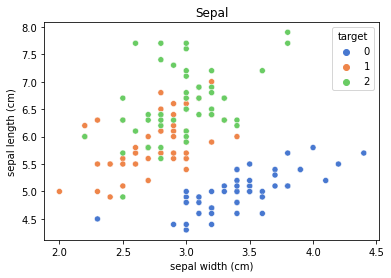

In [ ]:
# sepal에 대한 산점도 그림
sns.scatterplot('sepal width (cm)', 'sepal length (cm)', hue='target', palette='muted', data=df_iris)
plt.title('Sepal')
plt.show()

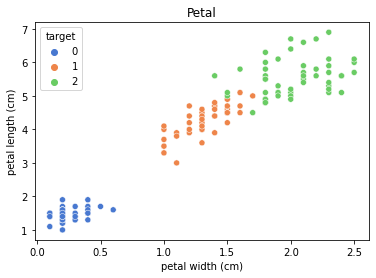

In [ ]:
# petal에 대한 산점도 그림
sns.scatterplot('petal width (cm)', 'petal length (cm)', hue='target', palette='muted', data=df_iris)
plt.title('Petal')
plt.show()

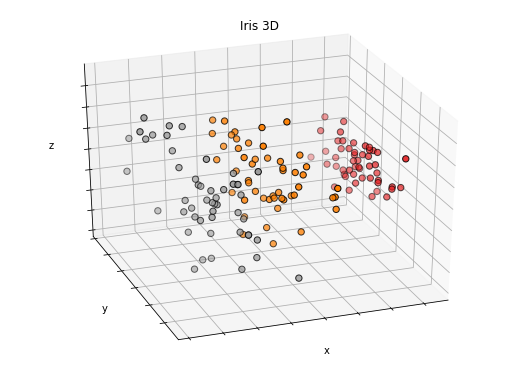

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

fig = plt.figure(figsize=(7, 5))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(df_iris.drop('target', 1))
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=df_iris['target'],
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Iris 3D")
ax.set_xlabel("x")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("y")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("z")
ax.w_zaxis.set_ticklabels([])

plt.show()

학습과 예측을 위해 데이터를 분리하기 위해 sklearn.model_selection으로부터 **train_test_split**를 임포트한다.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# 데이터를 나누기 위해 설명변수만 포함하도록 target열을 drop한다.
df_iris.drop('target', axis=1).head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


x에는 **target열을 드랍한 설명변수만** 포함하도록, y에는 **target열만** 포함하도록 데이터를 나눈다.

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target', 1), df_iris['target'])

In [ ]:
x_train.shape, y_train.shape

((112, 4), (112,))

In [ ]:
x_valid.shape, y_valid.shape

((38, 4), (38,))

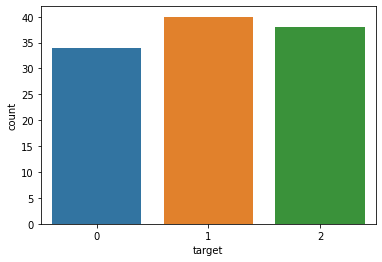

In [ ]:
# y_train의 각 종속변수의 분포 확인
sns.countplot(y_train)

**stratify**: 종속변수, 즉 label의 클래스의 분포를 균등하게 배분

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target', 1), df_iris['target'], stratify=df_iris['target'])

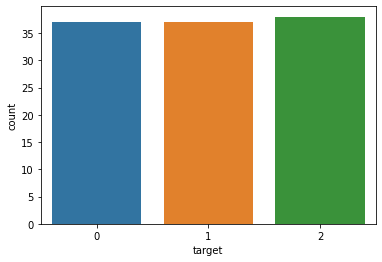

In [ ]:
# y_train의 각 종속변수의 분포 확인
sns.countplot(y_train)

## 4. Logistic Regression : 로지스틱 회귀

로지스틱회귀 알고리즘의 hyper-parameter를 확인 : [도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression)

* 로지스틱 회귀(logistic regression)는 영국의 통계학자인 D. R. Cox가 1958년에 제안한 확률 모델
* 독립 변수의 선형 결합을 이용하여 사건의 발생 가능성을 예측하는데 사용되는 통계 기법

LogisticRegression, 서포트 벡터 머신 (SVM) 과 같은 알고리즘은 **이진 분류만 가능**합니다. (**2개의 클래스 판별만 가능**합니다.)

하지만, 3개 이상의 클래스에 대한 판별을 진행하는 경우, 다음과 같은 전략으로 판별하게 됩니다.

**one-vs-rest (OvR)**: K 개의 클래스가 존재할 때, **1개의 클래스를 제외한 다른 클래스를 K개 만들어** 각각의 이진 분류에 대한 확률을 구하고 총합을 통해 최종 클래스를 판별

**one-vs-one (OvO)**: 4개의 계절을 구분하는 클래스가 존재한다고 가정했을 때, **0vs1, 0vs2, 0vs3, ... , 2vs3** 까지 NX(N-1)/2 개의 분류기를 만들어 가장 많이 양성으로 선택된 클래스를 판별

대부분 **OvsR 전략을 선호**합니다.

#### **step 1: 모델 선언**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression()

#### **step 2: 모델 학습**

In [ ]:
LR.fit(x_train, y_train)

LogisticRegression()

#### **step 3: 예측**

In [ ]:
prediction = LR.predict(x_valid)

In [ ]:
# 예측 결과
prediction[:5]

array([1, 0, 2, 0, 0])

#### **step 4: 평가**

In [ ]:
# 실제 결과
y_valid[:5]

82    1
8     0
70    1
19    0
43    0
Name: target, dtype: int64

In [ ]:
# 예측 결과와 실제 결과의 일치 확률
(prediction == y_valid).mean()

0.9736842105263158

## 5. SGDClassifier : 확률적 경사 하강법 분류(stochastic gradient descent, SGD)

In [ ]:
from IPython.display import Image

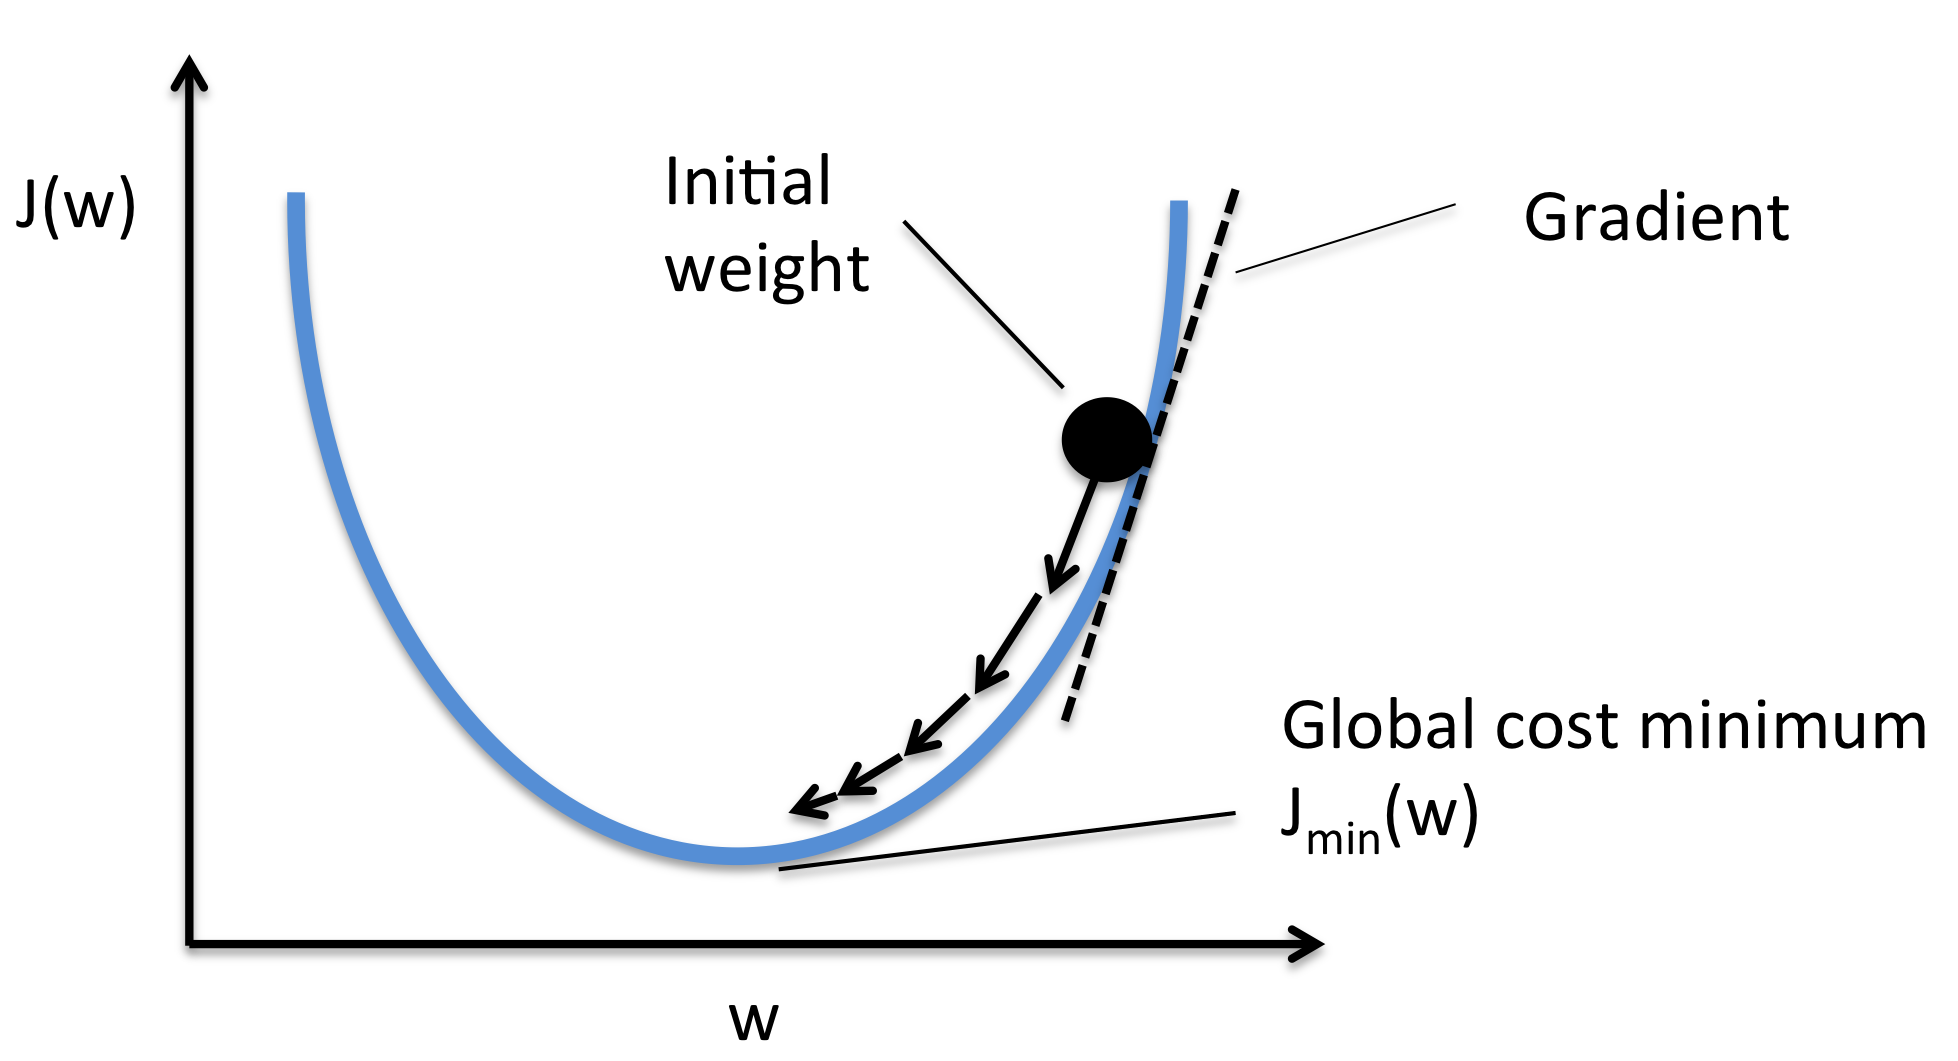

In [ ]:
# 출처: https://machinelearningnotepad.wordpress.com/
Image('https://machinelearningnotepad.files.wordpress.com/2018/04/yk1mk.png', width=500)

[sklearn 문서](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

#### **step 1: 모델 선언**

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sgd = SGDClassifier()

#### **step 2: 모델 학습**

In [ ]:
sgd.fit(x_train, y_train)

SGDClassifier()

#### **step 3: 예측**

In [ ]:
sgd_pred = sgd.predict(x_valid)

#### **step 4: 평가**

In [ ]:
(sgd_pred == y_valid).mean()

0.7894736842105263

## 6. 하이퍼 파라미터 (hyper-parameter) 튜닝
각 모델들의 세부 설정값을 조절하기

각 알고리즘 별로 hyper-parameter의 종류가 다양합니다.

모두 다 외워서 할 수는 없습니다. 문서를 보고 적절한 가설을 세운 다음 적용하면서 검증해야합니다. (나중에는 이 또한 자동으로 할 수 있습니다)

* random_state: 하이퍼 파라미터 튜닝시에 고정할 것
* n_jobs=-1: CPU를 모두 사용 (학습속도가 빠름)

SGD 알고리즘의 hyper-parameter를 확인 : [도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)


#### **step 1. 모델 선언**

In [ ]:
sgd = SGDClassifier(penalty='l1', random_state=0, n_jobs=-1)

#### **step 2. 모델 학습**

In [ ]:
sgd.fit(x_train, y_train)

SGDClassifier(n_jobs=-1, penalty='l1', random_state=0)

#### **step 3. 예측**

In [ ]:
sgd_pred = sgd.predict(x_valid)

#### **step 4. 평가**

In [ ]:
(sgd_pred == y_valid).mean()

0.9210526315789473

## 7. KNeighborsClassifier : 최근접 이웃 알고리즘

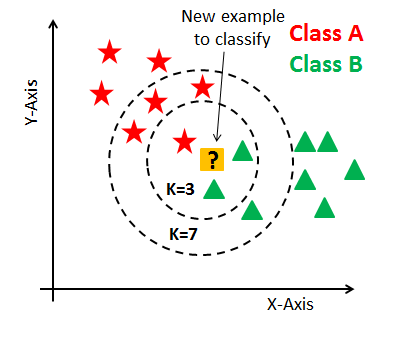

In [ ]:
# 출처: 데이터 캠프
Image('https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png')

각 최근접 이웃으로 판단하는 개수를 조절하여 그 안에 **많이 존재하는 그룹**으로 데이터를 분류한다.

최근접이웃 알고리즘의 hyper-parameter를 확인 : [도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)


#### **step 1. 모델 선언**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knc = KNeighborsClassifier()

KNeighborsClassifier()

#### **step 2. 모델 학습**

In [ ]:
knc.fit(x_train, y_train)

KNeighborsClassifier()

#### **step 3. 예측**

In [ ]:
knc_pred = knc.predict(x_valid)

#### **step 4. 평가**

In [ ]:
(knc_pred == y_valid).mean()

0.9736842105263158

최근접 이웃 알고리즘의 hyper-parameter 튜닝

In [ ]:
# 모델 선언
knc = KNeighborsClassifier(n_neighbors=9) # 기본값=5

In [ ]:
# 모델 학습
knc.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
# 예측
knc_pred = knc.predict(x_valid)

In [ ]:
(knc_pred == y_valid).mean()

0.9736842105263158

## 8. SVC : 서포트 벡터 머신

* 새로운 데이터가 **어느 카테고리에 속할지 판단**하는 비확률적 **이진 선형 분류** 모델을 만듦.
* 경계로 표현되는 데이터들 중 가장 큰 폭을 가진 경계를 찾는 알고리즘.

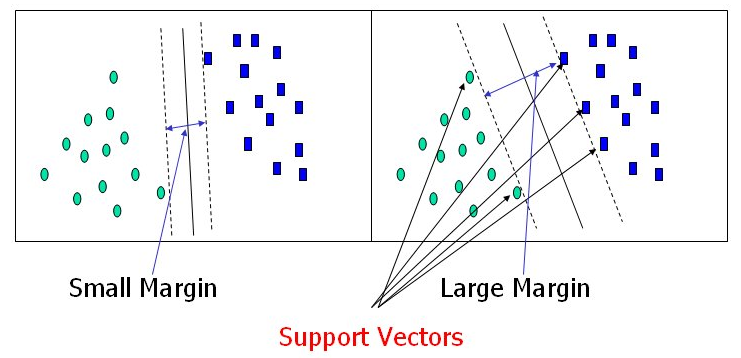

In [ ]:
Image('https://csstudy.files.wordpress.com/2011/03/screen-shot-2011-02-28-at-5-53-26-pm.png')

LogisticRegression과 같이 **이진 분류만 가능**합니다. (2개의 클래스 판별만 가능합니다.)

- **OvsR**(One vs Rest) 전략 사용

SVC 알고리즘의 hyper-parameter를 확인 : [도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

#### **stpe 1: 모델 선언**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()

#### **stpe 2: 모델 학습**

In [ ]:
svc.fit(x_train, y_train)

SVC()

#### **stpe 3: 예측**

In [ ]:
svc_pred = svc.predict(x_valid)
svc_pred[:5]

array([1, 0, 1, 0, 0])

#### **stpe 4. 평가**

In [ ]:
y_valid[:5]

82    1
8     0
70    1
19    0
43    0
Name: target, dtype: int64

In [ ]:
(svc_pred == y_valid).mean()

1.0

각 클래스 별로 가지는 확률값을 return 해주는 **decision_function()** : 가장 높은 값을 갖는 클래스로 분류된다.

In [ ]:
svc.decision_function(x_valid)[:5]

array([[-0.20907213,  2.243289  ,  0.83173556],
       [ 2.23117025,  1.12082926, -0.2463319 ],
       [-0.23543271,  2.1980078 ,  1.16165512],
       [ 2.23410578,  1.15069024, -0.25367114],
       [ 2.22473451,  1.17089967, -0.25245704]])

## 9. DecisionTreeClassifier : 의사 결정 나무

스무고개처럼, 나무 가지치기를 통해 소그룹으로 나누어 판별하는 것

In [ ]:
Image('https://www.researchgate.net/profile/Ludmila_Aleksejeva/publication/293194222/figure/fig1/AS:669028842487827@1536520314657/Decision-tree-for-Iris-dataset.png', width=500)

<IPython.core.display.Image object>

의사결정나무 알고리즘의 hyper-parameter를 확인 : [도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier)

#### **step 1: 모델 선언**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier(random_state=0)

#### **step 2: 모델 학습**

In [ ]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

#### **step 3: 예측**

In [ ]:
dtc_pred = dtc.predict(x_valid)

#### **stpe 4: 평가**

In [ ]:
(dtc_pred == y_valid).mean()

0.9736842105263158

각각의 가지에서 어떤 기준으로 분류되어 나갔는지 확인

In [ ]:
from sklearn.tree import export_graphviz
from subprocess import call

In [ ]:
def graph_tree(model):
    # .dot 파일로 export 해줍니다
    export_graphviz(model, out_file='tree.dot')

    # 생성된 .dot 파일을 .png로 변환
    call(['dot', '-Tpng', 'tree.dot', '-o', 'decistion-tree.png', '-Gdpi=600'])

    # .png 출력
    return Image(filename = 'decistion-tree.png', width=500)

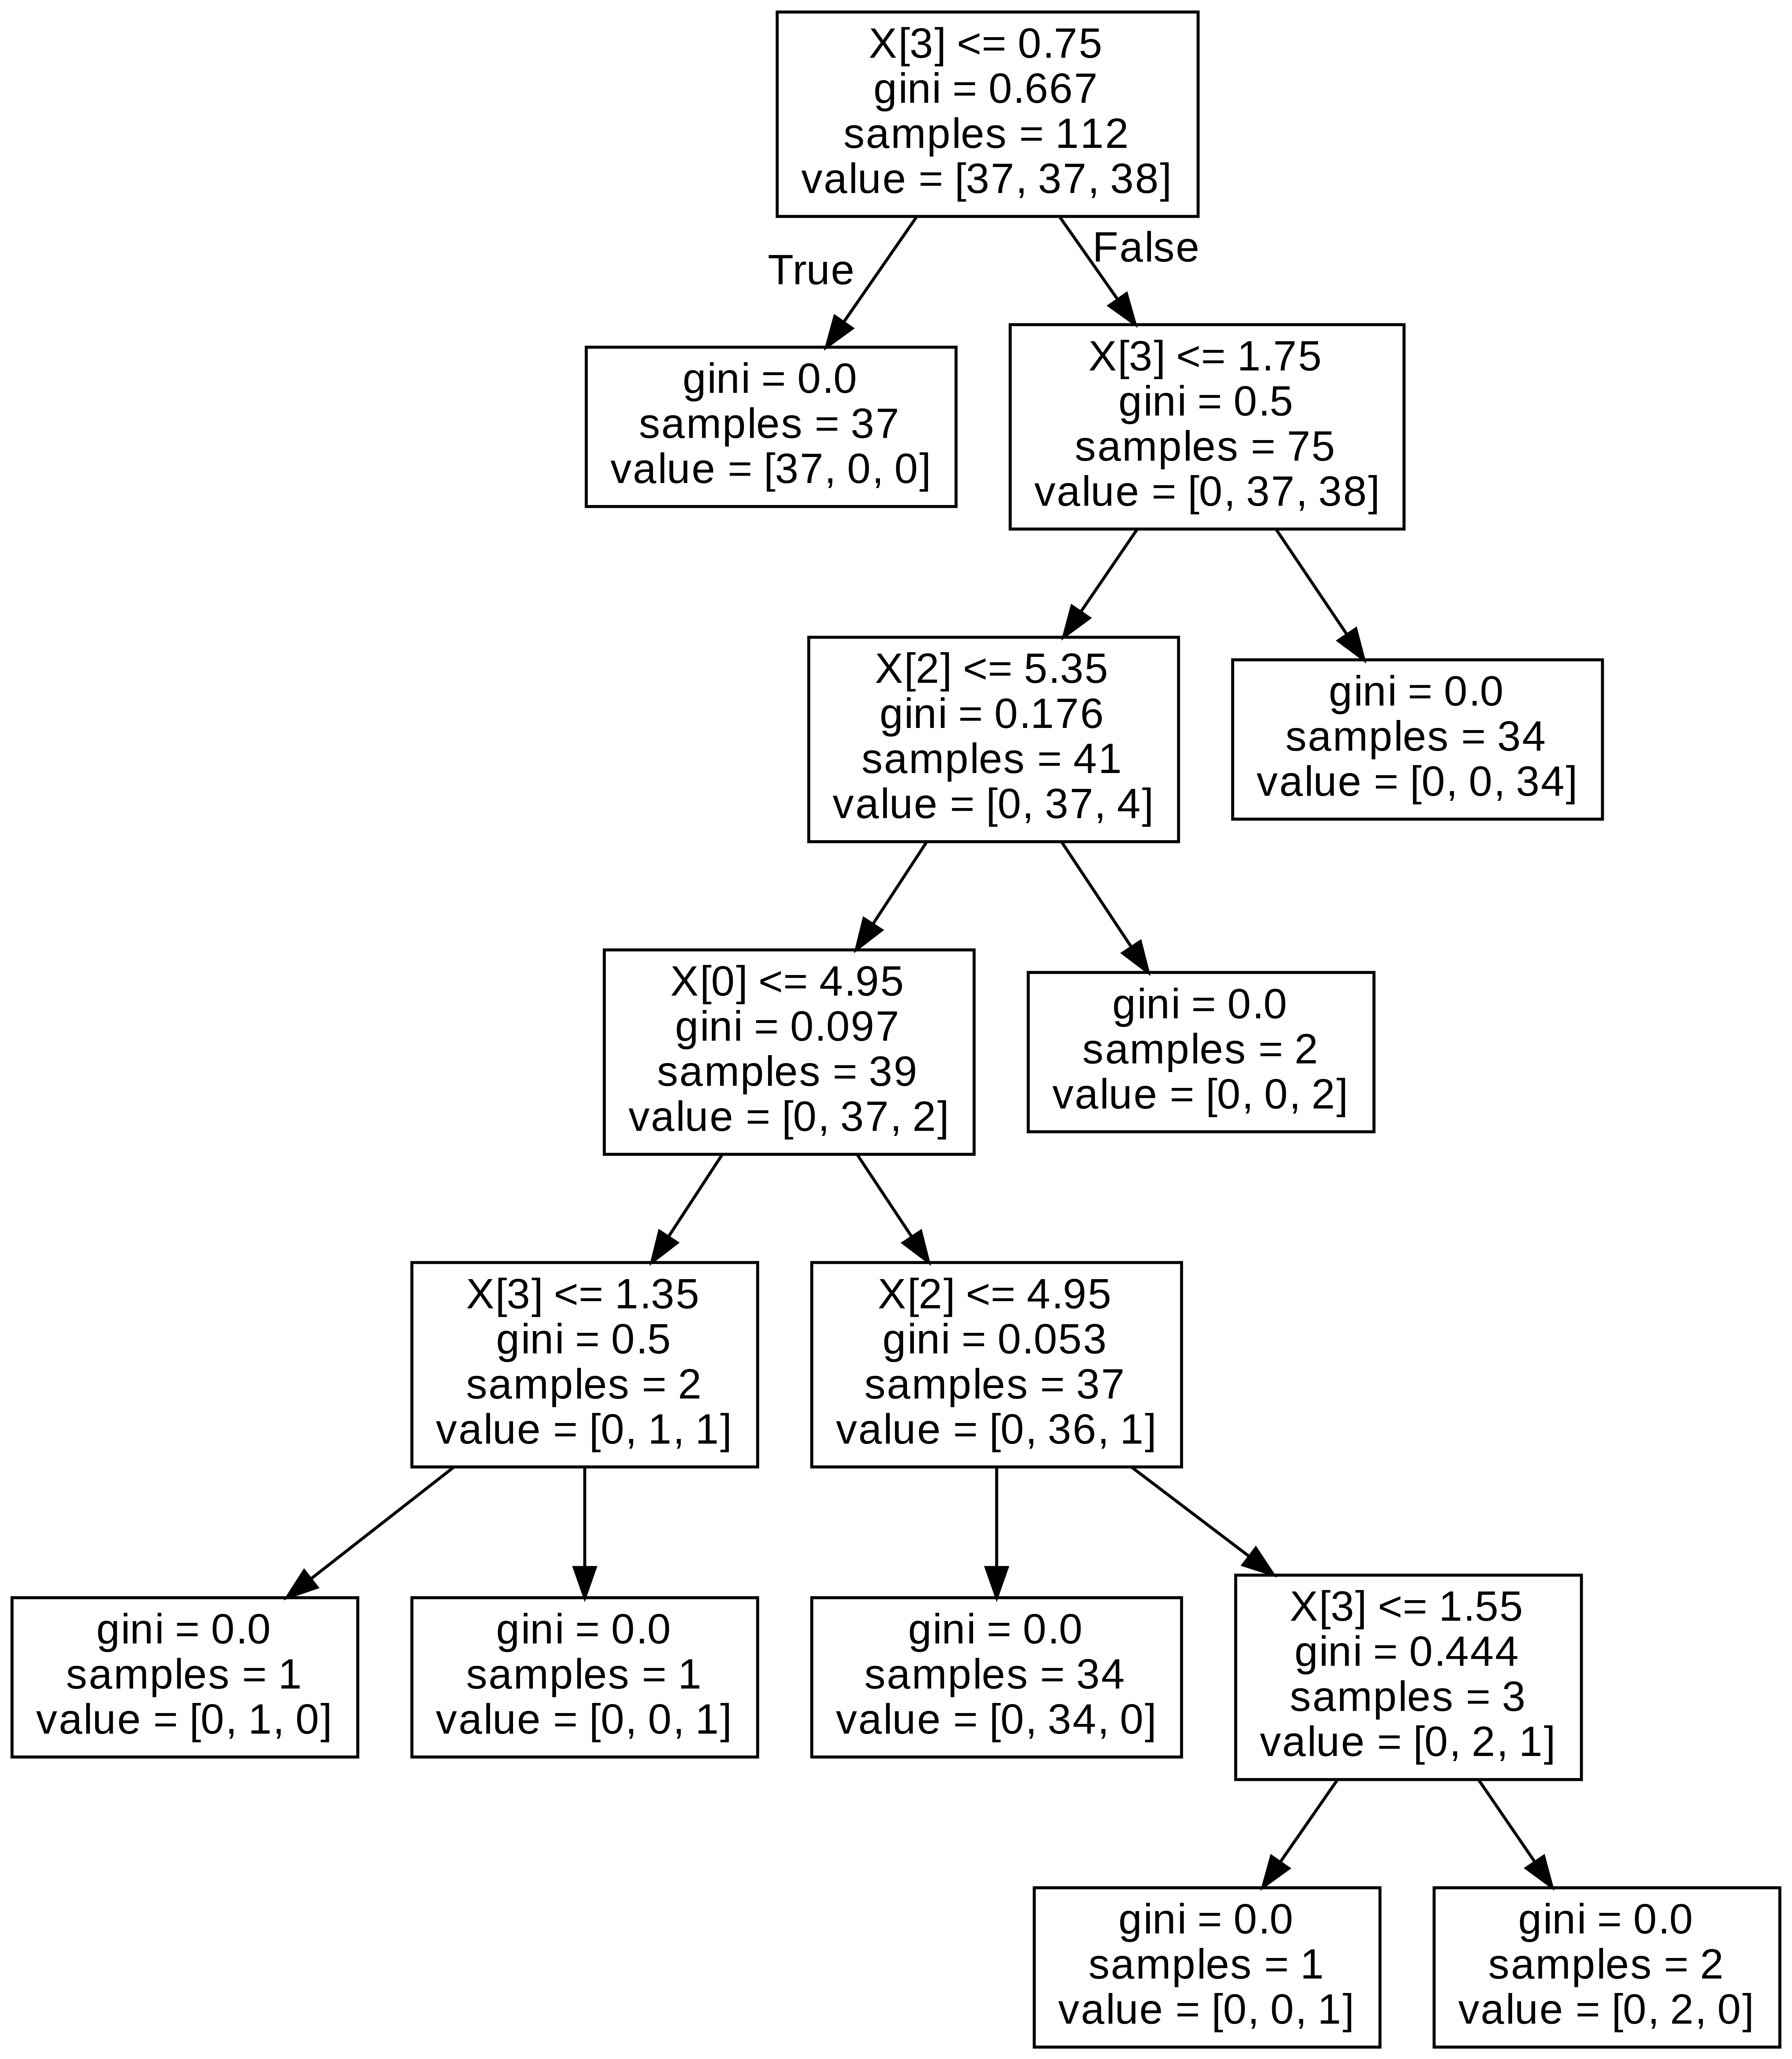

In [ ]:
graph_tree(dtc)

**gini계수**: 불순도를 의미, 지니계수가 높을 수록 엔트로피가 크다는 의미이며 이는 클래스가 혼잡하게 섞여 있다는 뜻

**gini계수가 0**이면 클래스가 섞여있지 않고 한 가지 종류로 분류되어 있다.

In [ ]:
dtc = DecisionTreeClassifier(max_depth=2) # 분류 가지를 2개까지만 보여주도록 설정
dtc.fit(x_train, y_train)
dtc_pred = dtc.predict(x_valid)

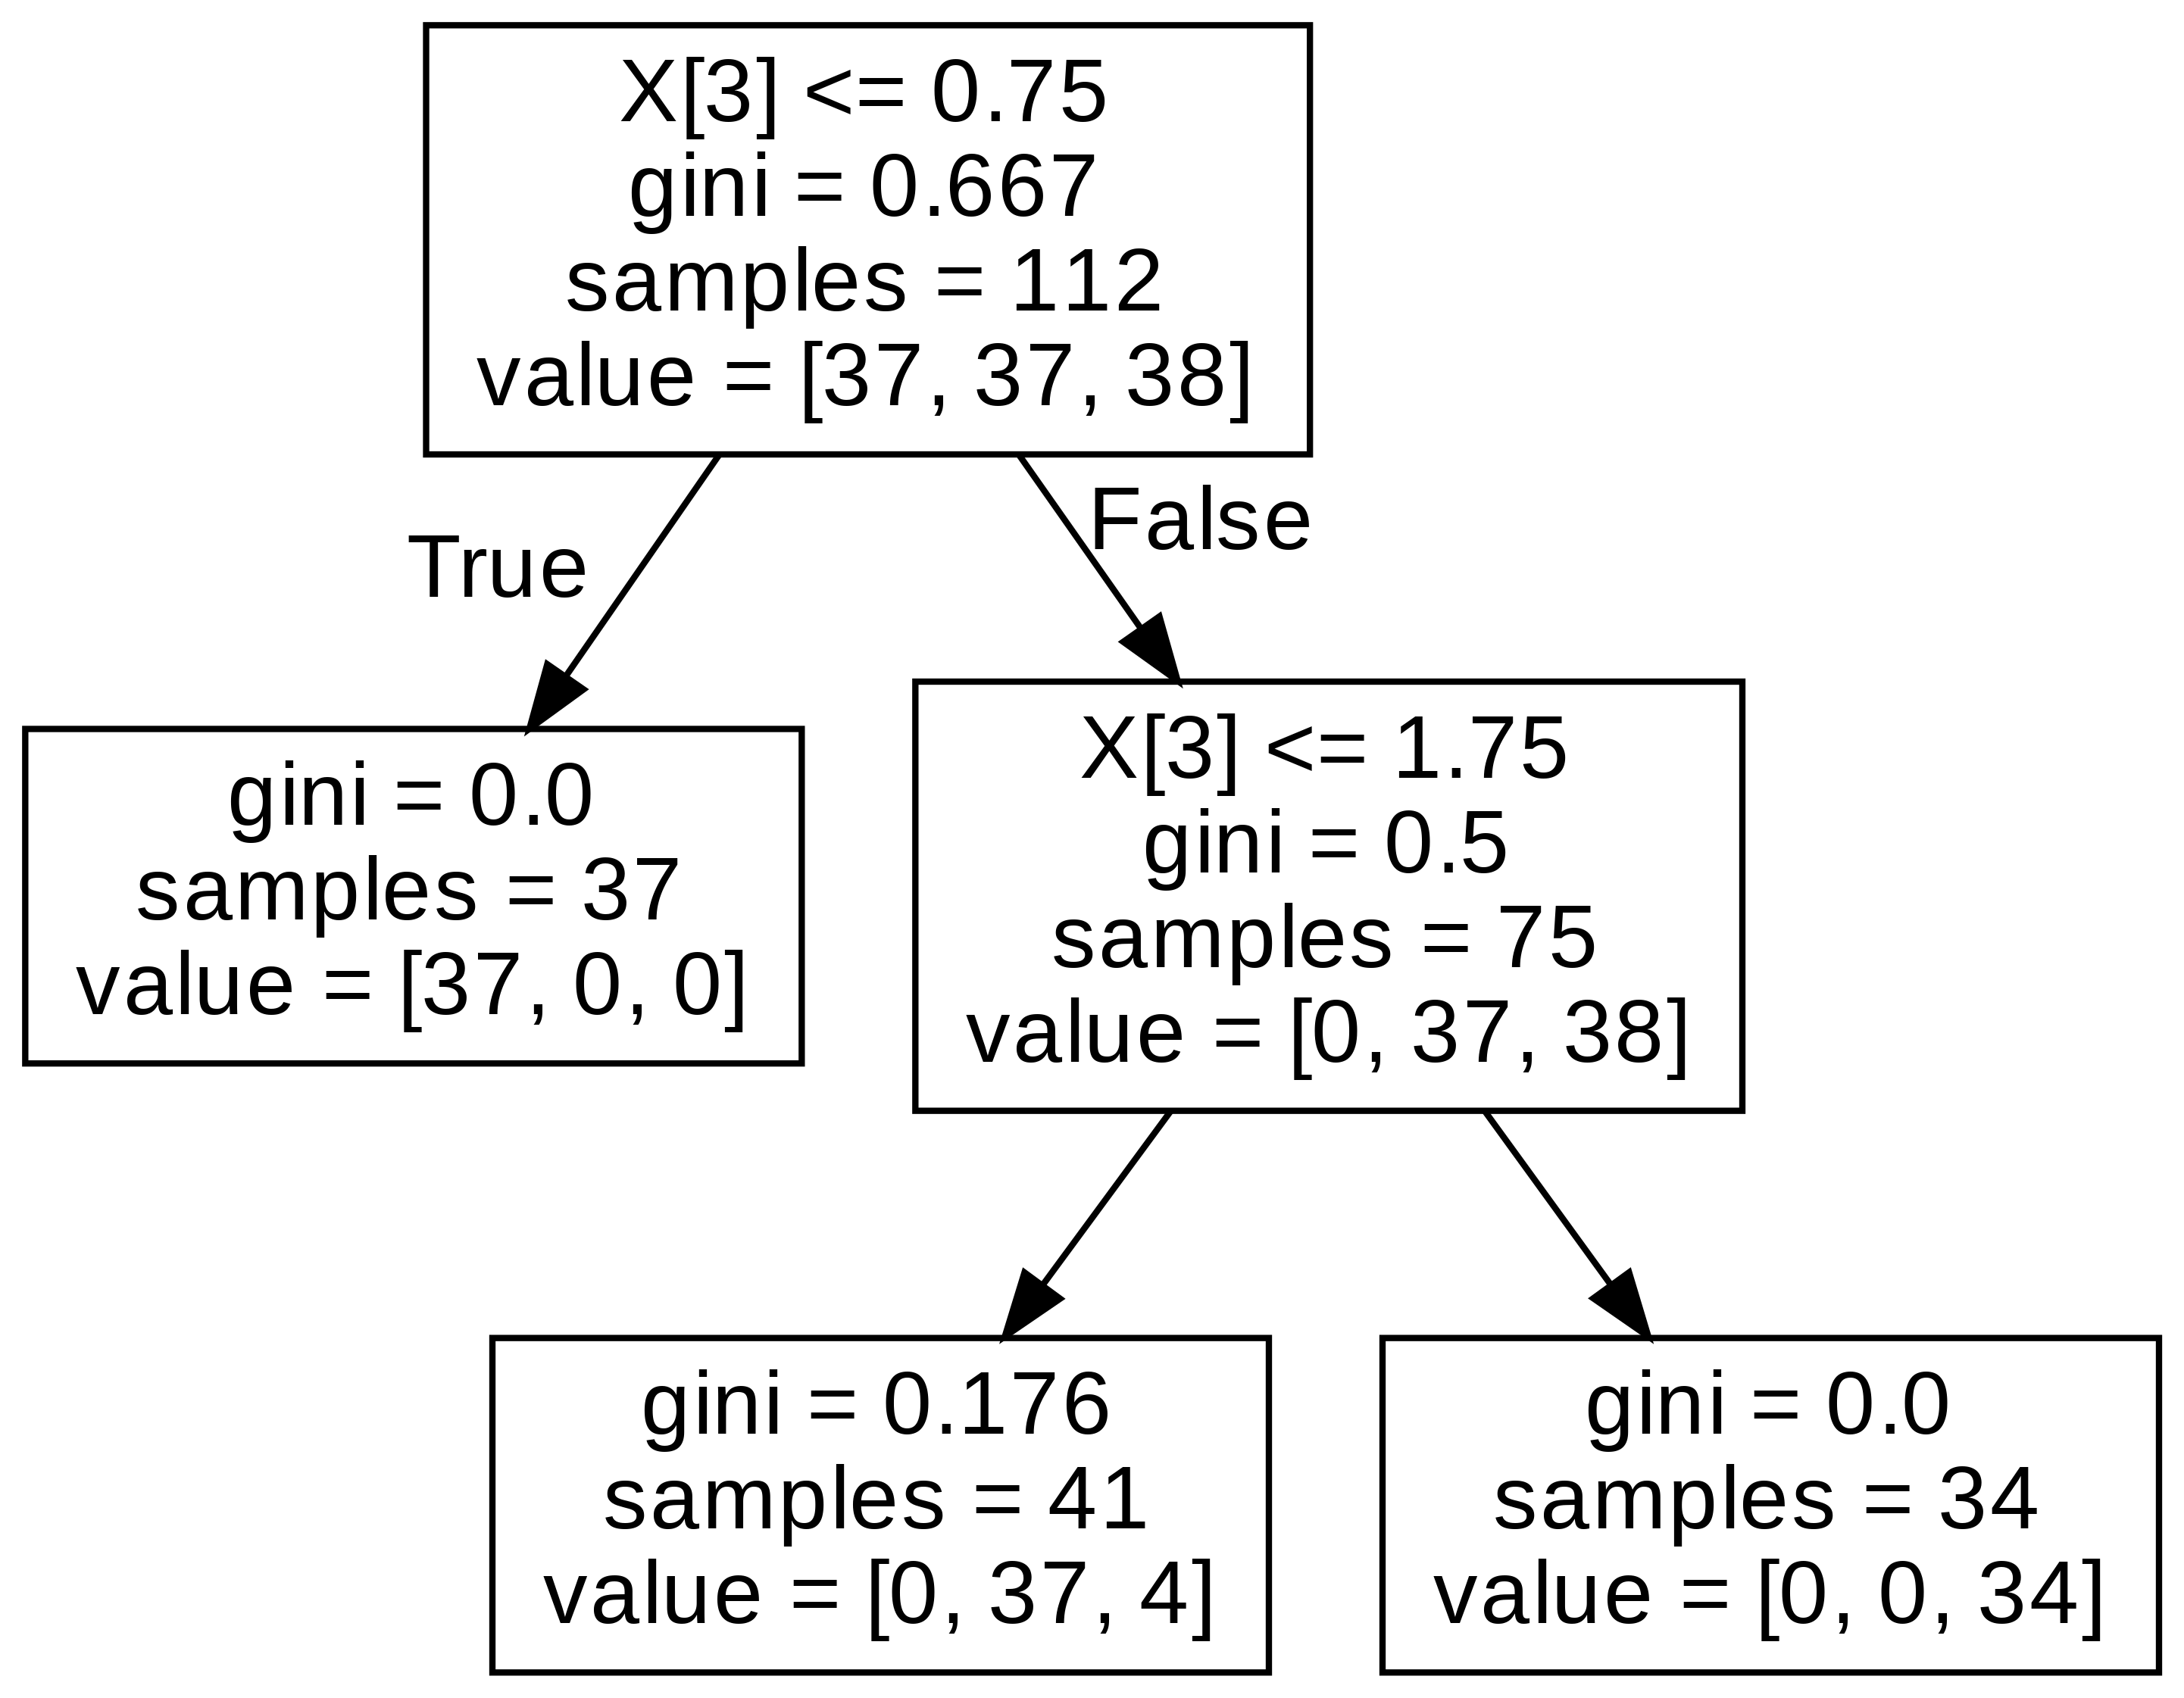

In [ ]:
graph_tree(dtc)

## 10. 오차 (Error)

### 10-1. 정확도의 함정

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np

유방암 환자 데이터셋을 로드합니다.

**target**: 0: 악성종양, 1:양성종양

In [ ]:
cancer = load_breast_cancer()

In [ ]:
print(cancer['DESCR']) # cancer 데이터에 대한 설명

In [ ]:
data = cancer['data'] # 설명변수 (30개)
feature_names=cancer['feature_names'] # 설명변수 이름
target = cancer['target'] # 종속변수 (0과 1 중 하나)

데이터 프레임을 생성합니다.

In [ ]:
df = pd.DataFrame(data=data, columns=feature_names) # 설명변수 데이터로부터 데이터프레임 생성
df['target'] = cancer['target'] # 종속변수 열 추가

In [ ]:
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [ ]:
pos = df.loc[df['target']==1] # 양성만 포함하는 데이터프레임 생성
neg = df.loc[df['target']==0] # 악성만 포함하는 데이터프레임 생성

In [ ]:
pos.count

<bound method DataFrame.count of      mean radius  mean texture  ...  worst fractal dimension  target
19        13.540         14.36  ...                  0.07259       1
20        13.080         15.71  ...                  0.08183       1
21         9.504         12.44  ...                  0.07773       1
37        13.030         18.42  ...                  0.06169       1
46         8.196         16.84  ...                  0.07409       1
..           ...           ...  ...                      ...     ...
558       14.590         22.68  ...                  0.08004       1
559       11.510         23.93  ...                  0.08732       1
560       14.050         27.15  ...                  0.08321       1
561       11.200         29.37  ...                  0.05905       1
568        7.760         24.54  ...                  0.07039       1

[357 rows x 31 columns]>

In [ ]:
neg.count

<bound method DataFrame.count of      mean radius  mean texture  ...  worst fractal dimension  target
0          17.99         10.38  ...                  0.11890       0
1          20.57         17.77  ...                  0.08902       0
2          19.69         21.25  ...                  0.08758       0
3          11.42         20.38  ...                  0.17300       0
4          20.29         14.34  ...                  0.07678       0
..           ...           ...  ...                      ...     ...
563        20.92         25.09  ...                  0.09873       0
564        21.56         22.39  ...                  0.07115       0
565        20.13         28.25  ...                  0.06637       0
566        16.60         28.08  ...                  0.07820       0
567        20.60         29.33  ...                  0.12400       0

[212 rows x 31 columns]>

총 양성 환자 357개 , 악성 환자 212개 중에서 **양성 357개**와 **악성 5개**를 결합하여 섞어서 새로운 샘플을 생성

concat은 행을 기준으로 데이터프레임 합치기, sort에 True 설정하여 순서 유지하지 않고 섞음

In [ ]:
sample = pd.concat([pos, neg[:5]], sort=True)

x에는 target을 제외한 설명변수만 포함하도록, y에는 target만 포함하도록 훈련데이터와 예측데이터로 나눈다.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(sample.drop('target', axis=1), sample['target'], random_state=42)

모델을 정의하고, 학습합니다.

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)

예측력을 평가합니다.

In [ ]:
(pred == y_test).mean()

0.978021978021978

모두 양성으로 판단하는 데이터의 예측력을 구해보자.


In [ ]:
my_pred = np.ones(shape=y_test.shape) # 데이터가 모두 1의 값을 가지는 배열을 생성

In [ ]:
(my_pred == y_test).mean()

0.989010989010989

실제 경우에는 악성 환자보다 양성 환자가 훨씬 더 많으므로 검사 결과를 무조건 일단 양성으로 진단한다면 정확도만 놓고 볼 때 성능이 좋습니다.

하지만 **무조건 양성 환자로 예측해서 예측율 98.9% 로 말하는 의사**는 과연 자질이 좋은 의사일까요?

정확도(accuracy)만 보고 분류기의 성능을 판별하는 것은 **위와 같은 오류**에 빠질 수 있습니다.

이를 보완하기 위해서 생겨난 지표들이 있습니다. 차차 알아보겠습니다.

### 10-2. 오차 행렬 (confusion maxtix)
오차 행렬을 보기 위해서는 sklearn.metrics로부터 **confusion_matrix**를 임포트한다.

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, pred) # 실제값과 예측값의 오차 행렬

array([[ 1,  0],
       [ 2, 88]])

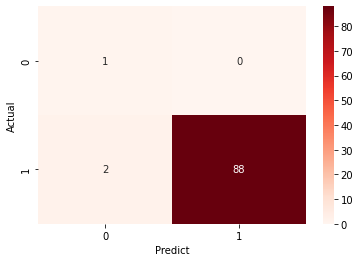

In [ ]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap='Reds')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

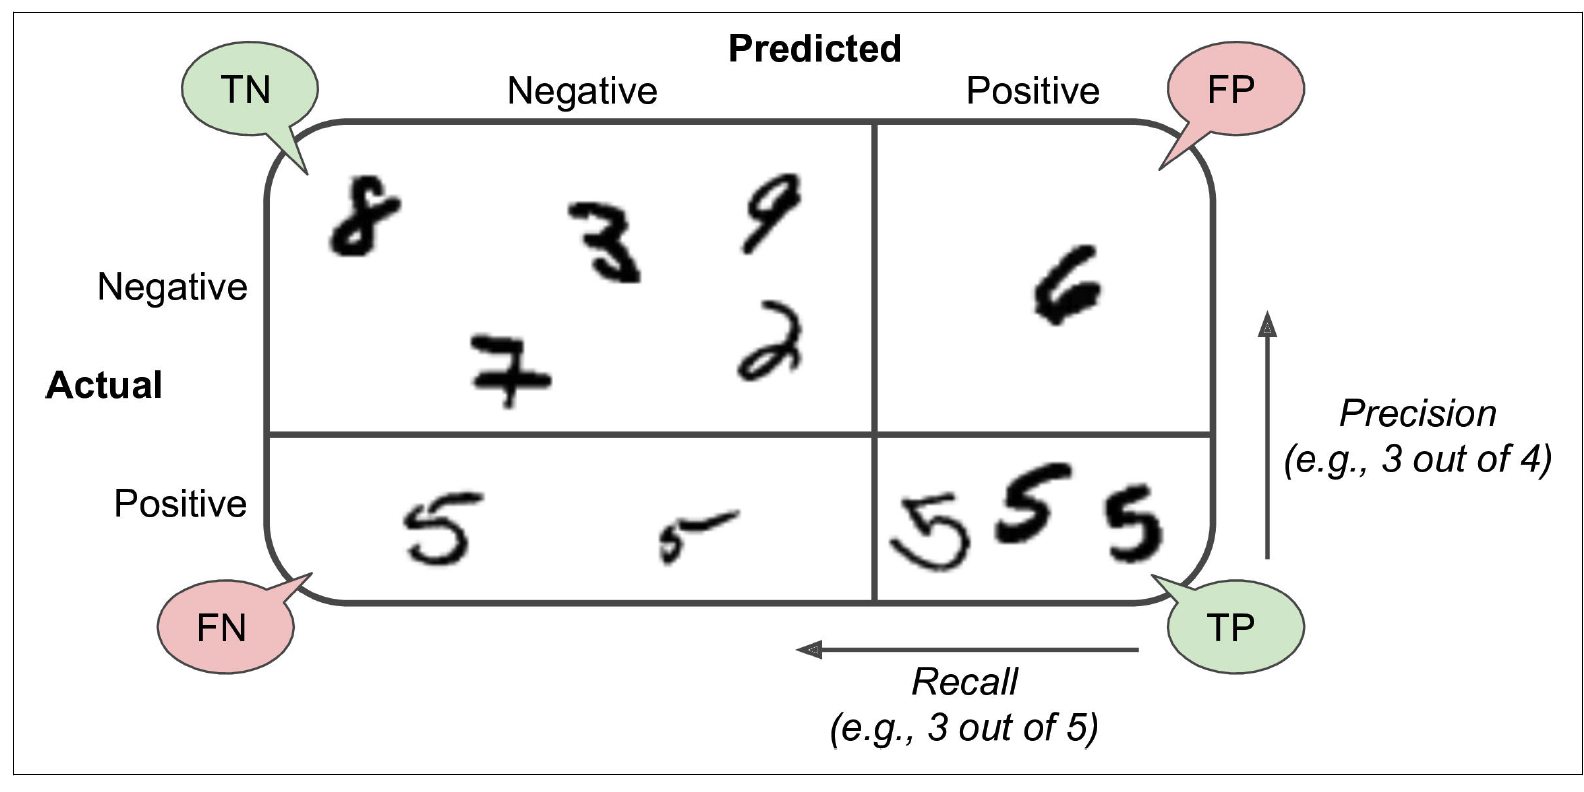

In [ ]:
# 출처: https://dojinkimm.github.io
Image('https://dojinkimm.github.io/assets/imgs/ml/handson_3_1.png', width=500)

### 10-3. 정밀도 (precision) : 양성 예측 정확도

**TP / (TP + FP)** : 양성으로 예측한 것 중에 진짜로 양성인 것의 비율

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
precision_score(y_test, pred) # 실제값과 예측값의 정밀도 = 88/(88+0)

1.0

무조건 **양성**으로 판단하면 좋은 정밀도를 얻기 때문에 유용하지 않습니다.

### 10-4. 재현율 (recall) : 민감도 (sensitivity) 혹은 True Positive Rate (TPR)
**TP / (TP + FN)** : 실제로 양성인 것 중에 양성으로 예측한 것의 비율


In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall_score(y_test, pred) # 실제값과 예측값의 재현율 = 88/(88+2)

0.9777777777777777

### 10-5. f1 score : 정밀도와 재현율의 **조화 평균**을 나타내는 지표

In [ ]:
Image('https://miro.medium.com/max/918/1*jCu9fNZS0hSRHVJ2cBTegg.png')

<IPython.core.display.Image object>

$$2*\frac{정밀도 * 재현율}{정밀도 + 재현율}=\frac{TP}{TP+\frac{FN+FP}{2}}$$



In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(y_test, pred) # 실제값과 예측값의 f1 score

0.9887640449438202